In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

import planckStyle
import pylab
import numpy as np
import matplotlib
import tkinter

matplotlib.use('TkAgg')

%matplotlib inline


In [8]:
#dir_name = '/home/isidro/SuperMC/chains/owaChains1'
#dir_name = '/home/isidro/SuperMC_fork_20nov/april/chains'
dir_name = '/home/isidro/SuperMC_/chains'

#roots = ['owaCDM_py_SN+BBAO+RiessH0_mh_50000_1', 'owaCDM_SN+BBAO+RiessH0_snest_0.6', 'owaCDM_SN+BBAO+RiessH0_mnest_0.6',
        #'owaCDM_SN+BBAO+RiessH0_sbambi_0.6', 'owaCDM_SN+BBAO+RiessH0_bambi_0.6']

roots = ['LCDM_py_SN+BBAO+HD+Planck_mnest_0.5', 'LCDMmasslessnu_py_SN+HD+BBAO+Planck_mnest_0.5', 
        'oLCDM_py_SN+HD+BBAO+Planck_mnest_0.5',
        'owaCDM_py_SN+BBAO+HD+Planck_mnest_0.5']


In [14]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 9,
                          ratio = 0.9, scaling=2,
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

<Figure size 648x583.2 with 0 Axes>

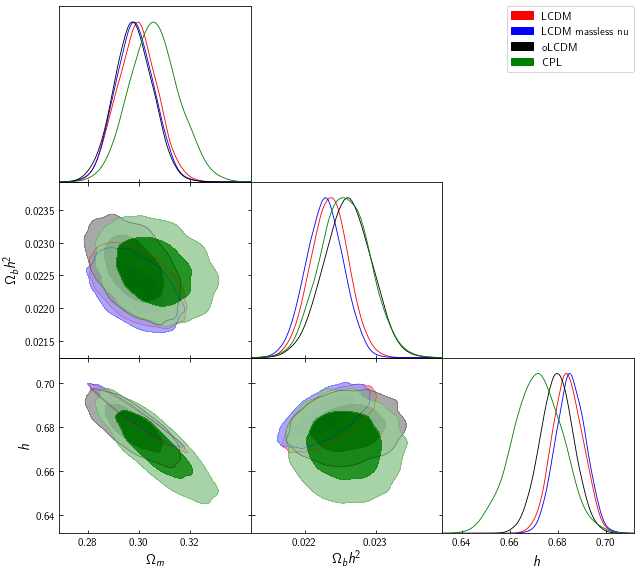

In [21]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 12
g.settings.axes_fontsize = 12
#g.settings.scatter_size = 9
#g.settings.lw_contour = 3

#g.settings.colormap_scatter='spring'

#g.triangle_plot(roots, ['Om', 'Obh2', 'h','w','wa','Ok'], 
#                
#                filled = False, nx=1, alphas=[0.7], 
#                colors=['red','blue','black','green','yellow'],
                #legend_labels=['MH', 'ENS', 'MULTINEST', 'ENS+ANN', 'BAMBI'], 
                #normalized=False, shaded=False)

g.triangle_plot(roots, ['Om', 'Obh2', 'h'], 
                diag1d_kwargs={'colors':['red','blue','black','green']},
                colors=['red','blue','black','green'],
                alphas = [0.9],
                legend_labels=['LCDM', 'LCDM massless nu', 'oLCDM', 'CPL'], 
                filled = True, 
                normalized=False, shaded=False)
        
#plt.show()
plt.savefig('cosmodelcomparison.png', dpi=300)

# Probando análisis con Getdist

Generate a MCSample object

In [17]:
LCDMsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[0], settings={'ignore_rows':0.0})
nuLCDMsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[1])
oLCDMsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[2])
owaCDMsamplefile = mcsamples.loadMCSamples(dir_name+'/'+roots[3])

In [20]:
freeParameters = ['Om', 'Obh2', 'h']

meansLCDM = LCDMsamplefile.getMeans()
meansnuLCDM = nuLCDMsamplefile.getMeans()
meansoLCDM = oLCDMsamplefile.getMeans()
meansowaCDM = owaCDMsamplefile.getMeans()

stdLCDM = LCDMsamplefile.std(freeParameters)
stdnuLCDM = nuLCDMsamplefile.std(freeParameters)
stdoLCDM = oLCDMsamplefile.std(freeParameters)
stdowaCDM = owaCDMsamplefile.std(freeParameters)


print("LCDM:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansLCDM[i], 4)) + " \pm " + str(round(stdLCDM[i], 4)) + "$}")

print("nuLCDM:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansnuLCDM[i], 4)) + " \pm " + str(round(stdnuLCDM[i], 4)) + "$}")

print("oLCDM:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansoLCDM[i], 4)) + " \pm " + str(round(stdoLCDM[i], 4)) + "$}")

print("owaCDM:")
for i, param in enumerate(freeParameters):
    print("& \scriptsize{$" + str(round(meansowaCDM[i], 4)) + " \pm " + str(round(stdowaCDM[i], 4)) + "$}")


##MHsamplefile.std('wa')


LCDM:
& \scriptsize{$0.2993 \pm 0.0079$}
& \scriptsize{$0.0224 \pm 0.0003$}
& \scriptsize{$0.6841 \pm 0.0064$}
nuLCDM:
& \scriptsize{$0.2984 \pm 0.0076$}
& \scriptsize{$0.0223 \pm 0.0003$}
& \scriptsize{$0.6854 \pm 0.0062$}
oLCDM:
& \scriptsize{$-0.0036 \pm 0.0077$}
& \scriptsize{$0.2978 \pm 0.0003$}
& \scriptsize{$0.0226 \pm 0.0071$}
owaCDM:
& \scriptsize{$0.306 \pm 0.0098$}
& \scriptsize{$0.0226 \pm 0.0003$}
& \scriptsize{$0.6715 \pm 0.0105$}


0.6037760778129502